# 7. Sanity check -- plots

Notebooks for experimenting with plot generation for the sanity check.

# City with police overlay

TODO:

- Change equal_area_from_geodf to use false origin.

In [1]:
import matplotlib.lines
import matplotlib.patches
import matplotlib.pyplot

from cpe_help import Department, util

In [2]:
dept = Department.sample()

In [3]:
city = dept.load_city_metadata()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(city)
city = city.to_crs(proj)
precincts = precincts.to_crs(proj)

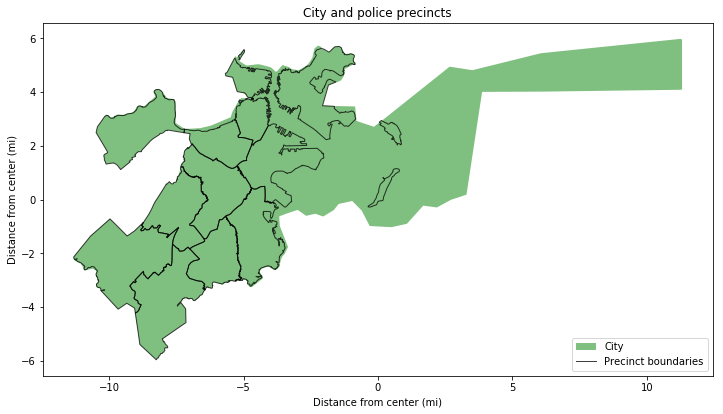

In [4]:
# imports

Line2D = matplotlib.lines.Line2D
Patch = matplotlib.patches.Patch


# plot

fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

city.plot(ax=ax, color='green', alpha=0.5)
precincts.plot(ax=ax, color='none', edgecolor='black', alpha=0.75)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='City'),
    Line2D([0], [0], color='black', alpha=0.75, lw=1, label='Precinct boundaries')
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("City and police precincts");

# Census tracts with police overlay

In [5]:
tracts = dept.load_census_tracts()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(tracts)
tracts = tracts.to_crs(proj)
precincts = precincts.to_crs(proj)

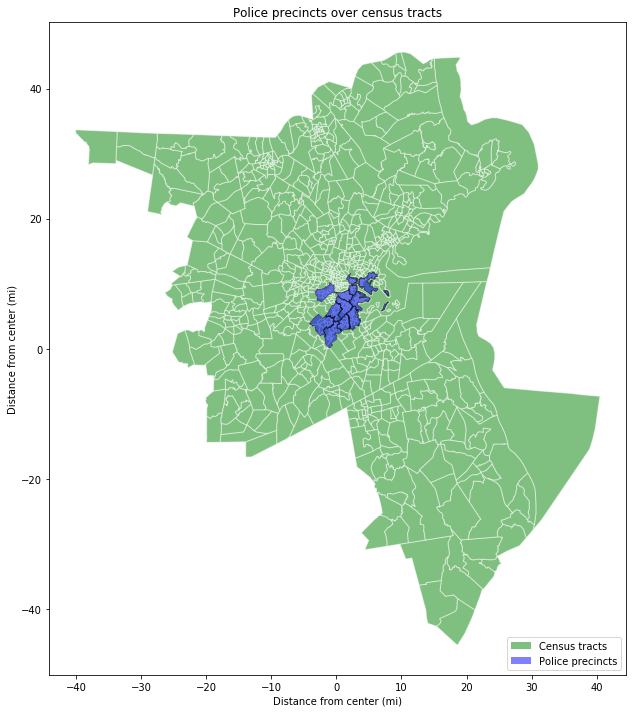

In [6]:
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

tracts.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='Census tracts'),
    Patch(facecolor='blue', alpha=0.5, label='Police precincts'),
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Police precincts over census tracts");

# Block groups with police overlay

In [7]:
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(bgs)
bgs = bgs.to_crs(proj)
precincts = precincts.to_crs(proj)

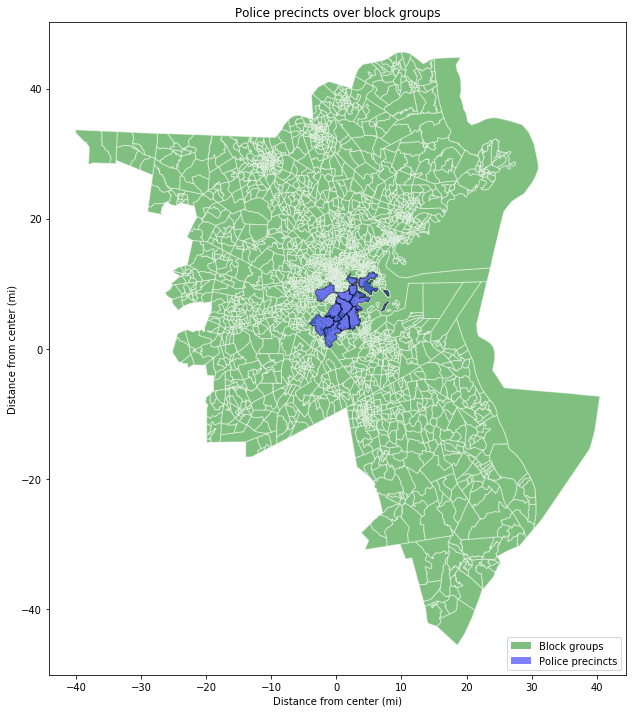

In [8]:
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

bgs.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='Block groups'),
    Patch(facecolor='blue', alpha=0.5, label='Police precincts'),
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Police precincts over block groups");

# Block groups with police overlay (zoomed in)

In [9]:
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()

# set up common projection
proj = util.crs.equal_area_from_geodf(bgs)
bgs = bgs.to_crs(proj)
precincts = precincts.to_crs(proj)

In [10]:
# get bounds
fig, ax = matplotlib.pyplot.subplots()
precincts.plot(ax=ax)
bounds = ax.axis()
matplotlib.pyplot.close(fig)

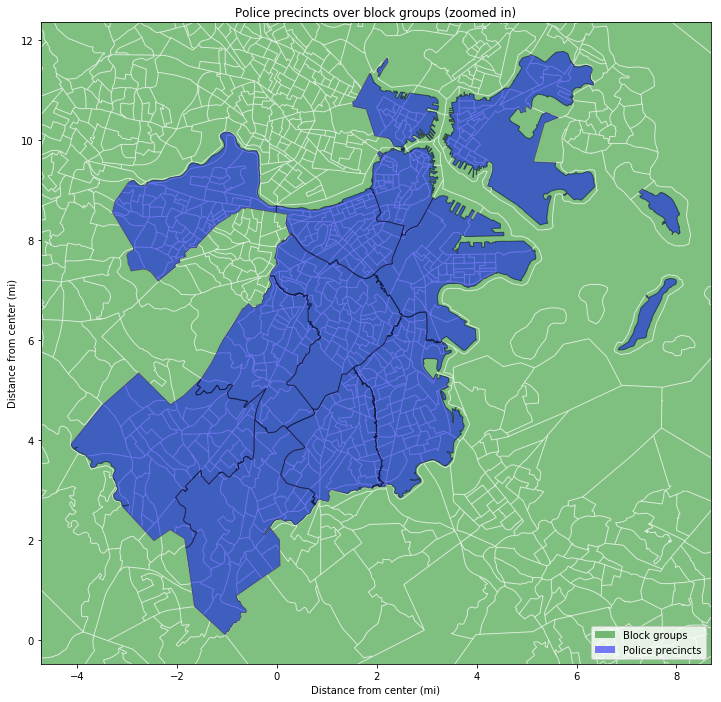

In [11]:
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

bgs.plot(ax=ax, color='green', edgecolor='white', alpha=0.5)
precincts.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

legend_handles = [
    Patch(facecolor='green', alpha=0.5, label='Block groups'),
    Patch(facecolor='blue', alpha=0.5, label='Police precincts'),
]
ax.legend(handles=legend_handles, loc='lower right')

ax.set_aspect('equal')
ax.axis(bounds)
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Police precincts over block groups (zoomed in)");

# Population density by block group

In [12]:
bgs = dept.load_block_groups()
precincts = dept.load_police_precincts()

# set up equal-area projection
proj = util.crs.equal_area_from_geodf(precincts)
bgs = bgs.to_crs(proj)
precincts = precincts.to_crs(proj)

# restrict area to intersection
_area = precincts.unary_union
bgs = bgs[bgs.intersects(_area)]

# calculate densities
bgs['POPULATION_DENSITY'] = bgs['TOTAL_POPULATION'] / bgs.area
precincts['POPULATION_DENSITY'] = precincts['TOTAL_POPULATION'] / precincts.area

In [13]:
# get bounds
fig, ax = matplotlib.pyplot.subplots()
precincts.plot(ax=ax)
bounds = ax.axis()
matplotlib.pyplot.close(fig)

/home/andre/miniconda3/envs/cpe/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


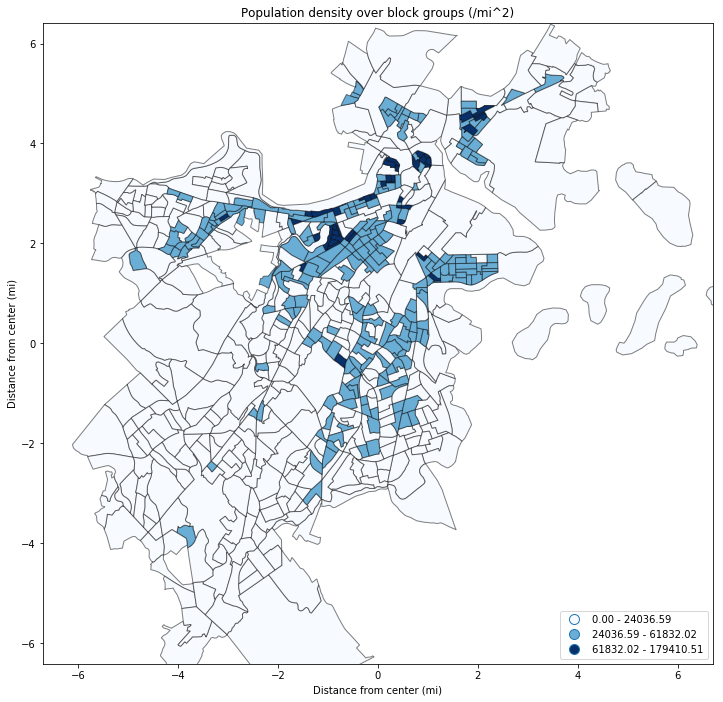

In [14]:
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

bgs.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    scheme='fisher_jenks',
    k=3,
    edgecolor=(0, 0, 0, 0.5),
    legend=True,
    legend_kwds={'loc': 'lower right'},
)

ax.set_aspect('equal')
ax.axis(bounds)
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Population density over block groups (/mi^2)");

# Population density by census tract

In [15]:
tracts = dept.load_census_tracts()
precincts = dept.load_police_precincts()

# set up equal-area projection
proj = util.crs.equal_area_from_geodf(precincts)
tracts = tracts.to_crs(proj)
precincts = precincts.to_crs(proj)

# restrict area to intersection
_area = precincts.unary_union
tracts = tracts[tracts.intersects(_area)]

# calculate densities
tracts['POPULATION_DENSITY'] = tracts['TOTAL_POPULATION'] / tracts.area
precincts['POPULATION_DENSITY'] = precincts['TOTAL_POPULATION'] / precincts.area

In [16]:
# get bounds
fig, ax = matplotlib.pyplot.subplots()
precincts.plot(ax=ax)
bounds = ax.axis()
matplotlib.pyplot.close(fig)

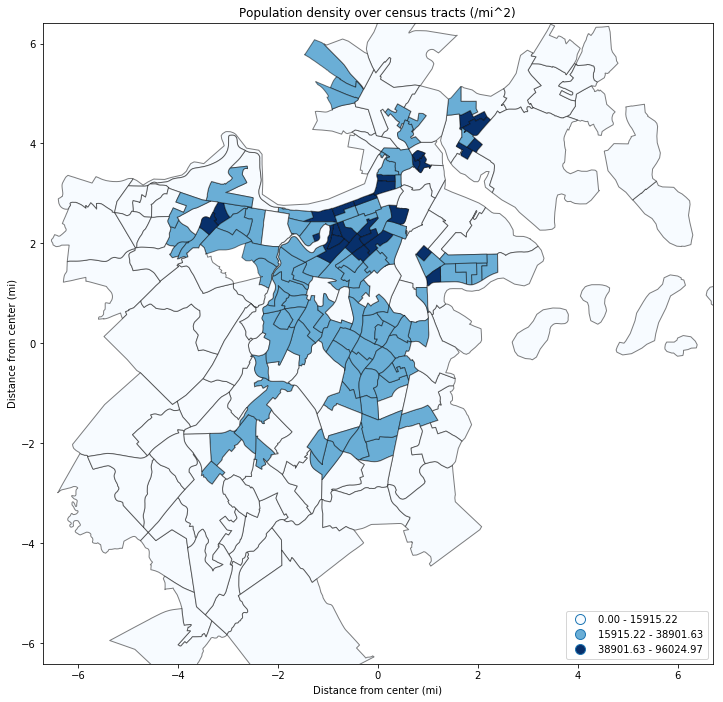

In [17]:
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

tracts.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    scheme='fisher_jenks',
    k=3,
    edgecolor=(0, 0, 0, 0.5),
    legend=True,
    legend_kwds={'loc': 'lower right'},
)

ax.set_aspect('equal')
ax.axis(bounds)
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Population density over census tracts (/mi^2)");

# Population density by police precinct 

In [18]:
precincts = dept.load_police_precincts()

# set up equal-area projection
proj = util.crs.equal_area_from_geodf(precincts)
precincts = precincts.to_crs(proj)

# calculate densities
precincts['POPULATION_DENSITY'] = precincts['TOTAL_POPULATION'] / precincts.area

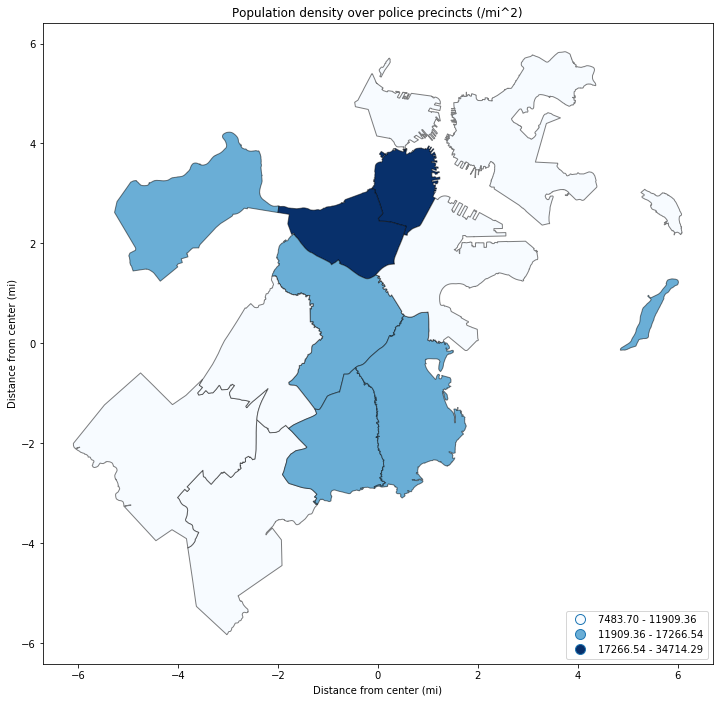

In [19]:
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

precincts.plot(
    ax=ax,
    column='POPULATION_DENSITY',
    cmap='Blues',
    scheme='fisher_jenks',
    k=3,
    edgecolor=(0, 0, 0, 0.5),
    legend=True,
    legend_kwds={'loc': 'lower right'},
)

ax.set_aspect('equal')
ax.set_xlabel('Distance from center (mi)')
ax.set_ylabel('Distance from center (mi)')
ax.set_title("Population density over police precincts (/mi^2)");